In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

#df = pd.read_csv('data/Data_2018_2021.csv')
#df_jo_fr = pd.read_csv('data/jours-ouvres-week-end-feries-france-2010-a-2030.csv', sep=';')
#df_jo_fr.Date = pd.to_datetime(df_jo_fr.Date)
#df.Date = pd.to_datetime(df.Date)

# 0. Exploration des données

**Questions** :
* Quelle est la signification de la variable SpotPrice ? en € pour toutes (esp GB)?
* Thématique de changement d'heure entre les pays ?
* Load : prévision de la consommation européenne, des pays concernés ou juste de la france ? Même question pour les prix.
* Plus d'information sur Coal & Oil ? 


**Idées**
* Pour les vacances : plutôt prendre vacances par vacances que une seule variable ;


## 1) Statistiques informatives basiques

In [103]:
df.columns

Index(['Date', 'Hour', 'SpotPrice', 'Load', 'Prev_J2_Load', 'Prev_J1_Solar',
       'Prev_J1_WindOnshore', 'ES_SpotPrice', 'BE_SpotPrice', 'CH_SpotPrice',
       'IT_SpotPrice', 'UK_SpotPrice', 'DE_SpotPrice', 'GazPrice',
       'GBP_EUR_SPOT', 'USD_EUR_SPOT', 'M1_Coal', 'M1_Oil', 'Biomass',
       'Fossil_Gas', 'Fossil_Hard_Coal', 'Fossil_Oil', 'Hydro_Pumped_Storage',
       'Hydro_Run-of-river_and_poundage', 'Hydro_Water_Reservoir', 'Nuclear',
       'Solar', 'Waste', 'Wind_Onshore', 'Import_FR_BE', 'Import_FR_CH',
       'Import_FR_ES', 'Import_FR_GB', 'Import_FR_IT_North', 'Import_FR_DE',
       'Export_FR_BE', 'Export_FR_CH', 'Export_FR_ES', 'Export_FR_GB',
       'Export_FR_IT_North', 'Export_FR_DE'],
      dtype='object')

In [104]:
df.describe()

,Hour,SpotPrice,Load,Prev_J2_Load,Prev_J1_Solar,Prev_J1_WindOnshore,ES_SpotPrice,BE_SpotPrice,CH_SpotPrice,IT_SpotPrice,...,Import_FR_ES,Import_FR_GB,Import_FR_IT_North,Import_FR_DE,Export_FR_BE,Export_FR_CH,Export_FR_ES,Export_FR_GB,Export_FR_IT_North,Export_FR_DE
count,35064.000000,35064.000000,35022.000000,35040.000000,34724.000000,34760.000000,35064.000000,35064.000000,35064.000000,35062.000000,...,35064.000000,34889.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34889.000000,35064.000000,35064.000000
mean,11.500000,57.740478,52754.534321,52841.777397,1369.837299,3762.928665,62.701105,57.639987,60.501893,68.720440,...,495.509927,117.608043,21.043749,298.940906,-717.399581,-875.852775,-1414.366499,-1450.522858,-1618.171486,-1363.601138
std,6.922285,53.824810,11498.173633,11750.180579,1945.092431,2740.329696,48.722547,51.533708,54.307228,54.778852,...,878.185253,369.925226,121.716880,570.559346,889.577300,848.611236,1130.628149,802.788778,798.126549,1239.651919
min,0.000000,-75.820000,29398.000000,25790.500000,0.000000,185.090000,0.010000,-500.000000,-79.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-4166.650000,-4255.000000,-5567.410000,-3055.000000,-3886.000000,-5223.070000
25%,5.750000,32.500000,43957.000000,43774.500000,0.000000,1728.845000,38.980000,33.000000,35.230000,42.000000,...,0.000000,0.000000,0.000000,0.000000,-1319.890000,-1475.027500,-2378.777500,-2017.000000,-2200.000000,-2351.820000
50%,11.500000,44.880000,51053.000000,51037.500000,13.815000,2918.390000,51.245000,45.310000,46.650000,54.920000,...,0.000000,0.000000,0.000000,0.000000,-260.880000,-727.000000,-1572.510000,-1624.000000,-1695.000000,-1086.395000
75%,17.250000,62.162500,60638.500000,60990.625000,2548.187500,4995.432500,65.700000,63.132500,63.260000,70.837500,...,707.845000,0.000000,0.000000,361.620000,0.000000,0.000000,0.000000,-976.000000,-1115.000000,-163.545000
max,23.000000,620.000000,94492.000000,94494.500000,8346.290000,15169.980000,409.000000,620.000000,532.210000,555.000000,...,3772.020000,2662.000000,2528.000000,5163.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [105]:
print(len(df))

35064


### a) NaNs

In [106]:
df.isna().sum().head(40)

Date                                   0
Hour                                   0
SpotPrice                              0
Load                                  42
Prev_J2_Load                          24
Prev_J1_Solar                        340
Prev_J1_WindOnshore                  304
ES_SpotPrice                           0
BE_SpotPrice                           0
CH_SpotPrice                           0
IT_SpotPrice                           2
UK_SpotPrice                        8785
DE_SpotPrice                           0
GazPrice                               0
GBP_EUR_SPOT                       10464
USD_EUR_SPOT                       10464
M1_Coal                            10752
M1_Oil                             10248
Biomass                               24
Fossil_Gas                            24
Fossil_Hard_Coal                      24
Fossil_Oil                            24
Hydro_Pumped_Storage                  24
Hydro_Run-of-river_and_poundage       24
Hydro_Water_Rese

In [107]:
list_col_nans = df.columns[df.isna().sum() / len(df) * 100 > 0]

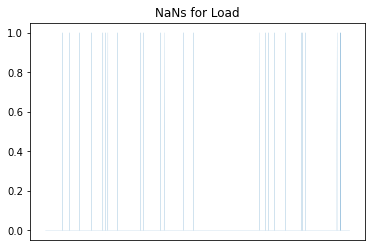

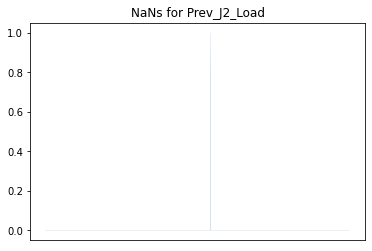

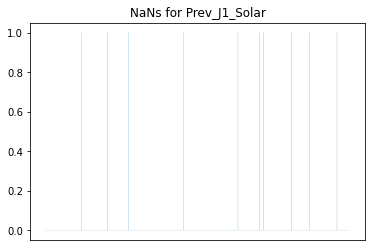

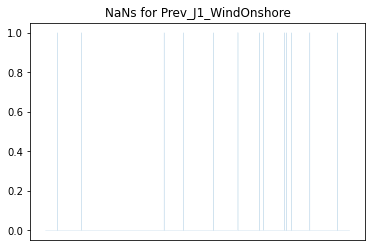

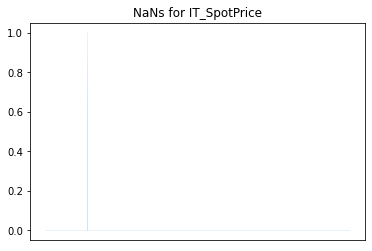

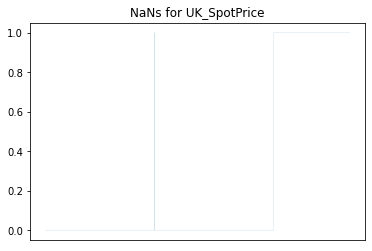

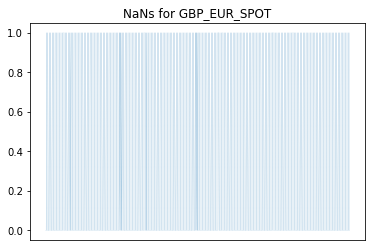

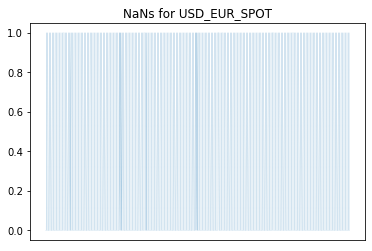

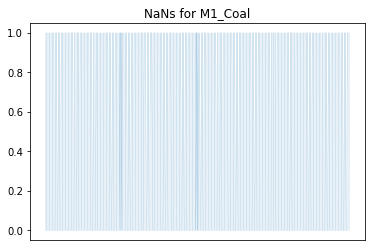

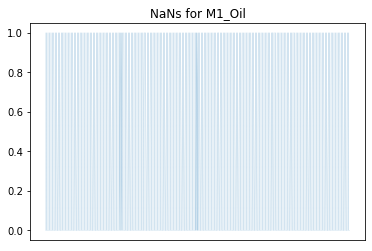

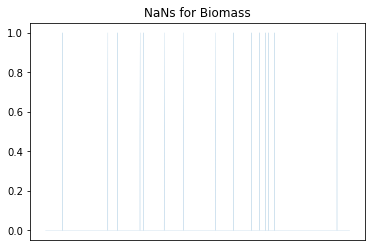

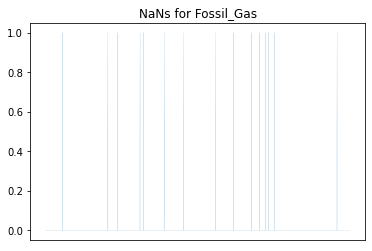

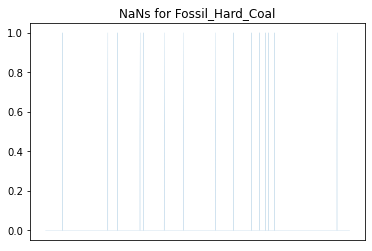

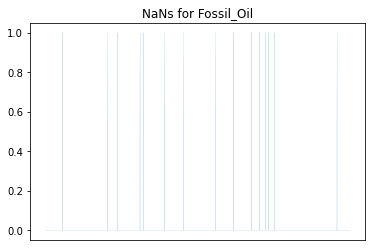

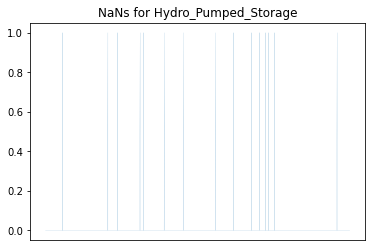

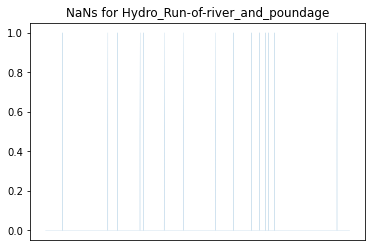

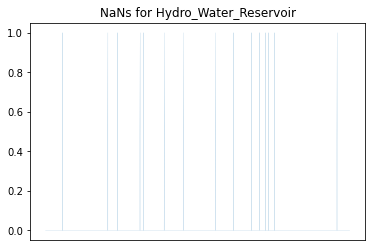

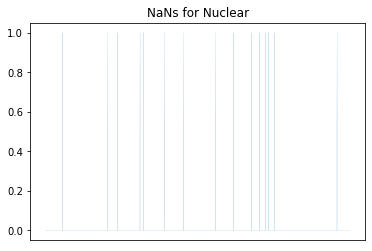

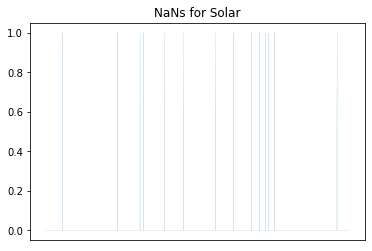

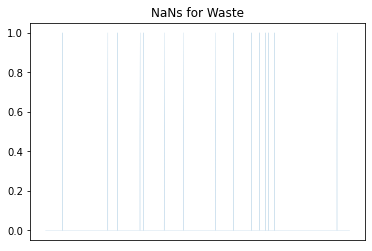

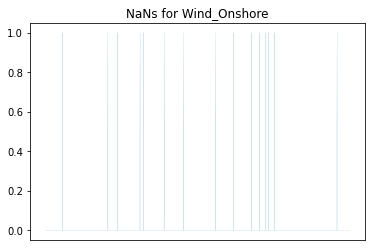

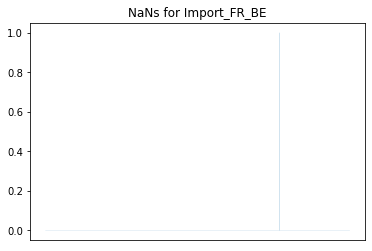

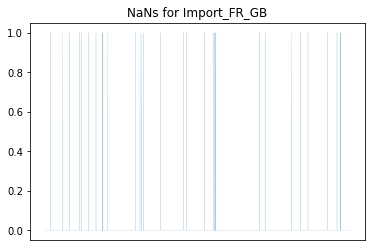

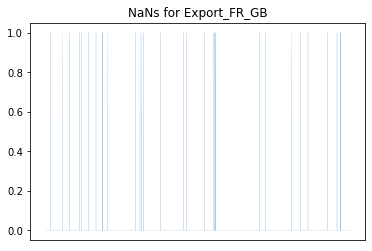

In [108]:
list_na_cols = []
for col in list_col_nans:
    list_na_cols.append(f'{col}_isna')
    df[f'{col}_isna'] = df[col].isna().astype(int)
    plt.plot(df.Date, df[f'{col}_isna'], linewidth=0.1)
    plt.title(f"NaNs for {col}")
    plt.xticks([])
    plt.show()

<AxesSubplot:>

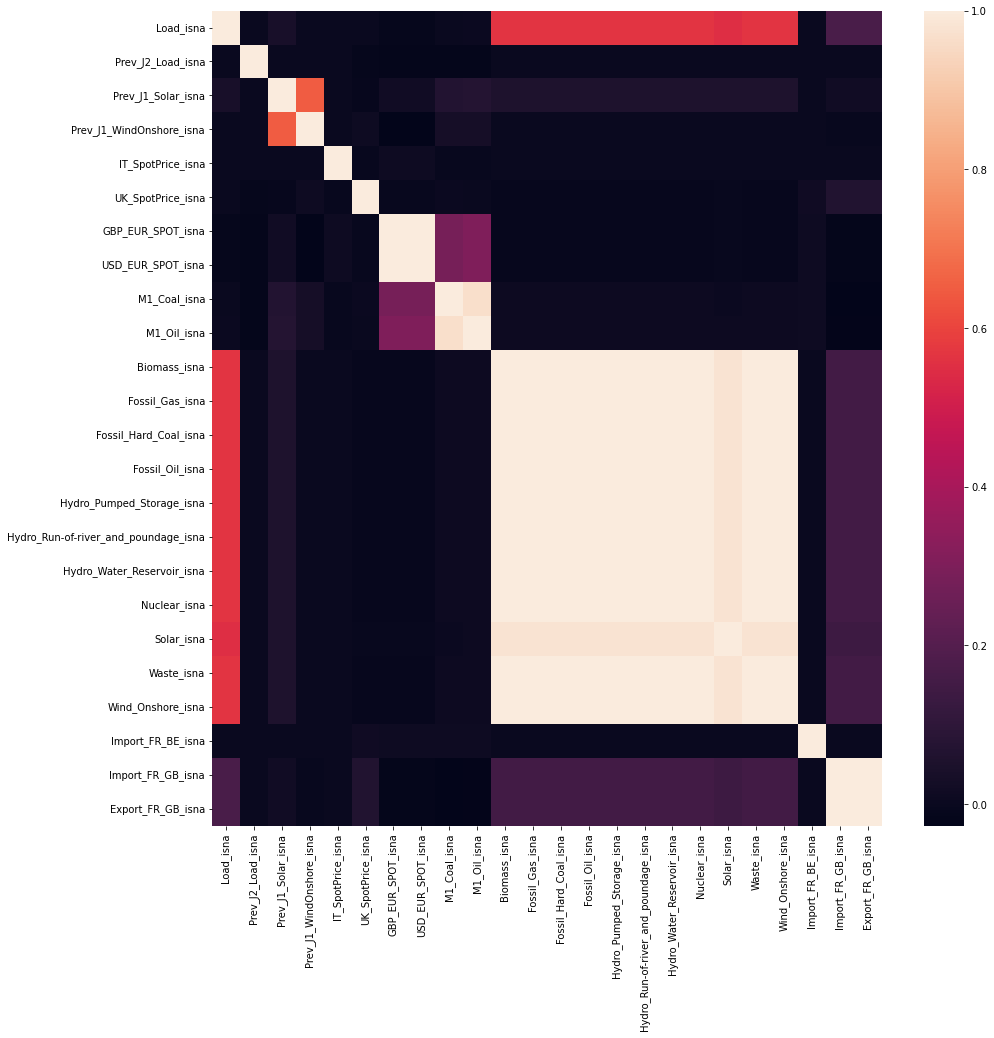

In [109]:
plt.figure(figsize=(15,15))
sns.heatmap(df[list_na_cols].corr())

#### Further inspection

* Load, Biomas,... Wind_onshore : at most three consecutive hours (very rare) -> linear interpolation ? (around 25 values)
* Prev_J2_Load 3 mars 2020 pas présent : moyenne entre le j+7 et j-7 / Semaine de vacances zone A uniquement
* Import Export_FR_GB : Certaines dates (9) ont six heures ou plus de Nans : Que faire : prendre 1 jour avant ? ( 175 valeurs en tout) : Interpolation linéaire sur des plateauw de 2h, puis avec les jours suivants et précédents pour le reste ;

* IT_SpotPrice : 2 var nans : 2018/07/20 à 22 et 23h : pq ? ==> Juste une interpolation
* UK_SpotPrice : on supprime la variable pour le moment
* Import_FR_BE : 2 var nans : 2021/01/30 à 21h et 22h  ==> Juste une interpolation

* M1_Oil : only full days are missing in total 427 ( sur 1461): WE et qqs jours fériés (mais d'autres non...) + Vendredi saint : extension du dernier prix enregistré
* M1_Coal : la même, avec même qqs jours normaux sans raisons ? extension du dernier prix enregistré, même normaux
* USD_EUR , GBP_EUR :Vendredi et samedi plus certains jours fériés, jours particulier (24 dec, 31,...) : extension du dernier prix enregistré (banques fermés)
* Prev_J1_Solar : Certaines journées (ou un peu plus, jusqu'à 48h) ne sont pas renseignées : interpolation heure par heure, pareil pour Wind même si ce ne sont pas les mêmes jours.


==> On décide d'ignorer la variable de prix anglaise

In [257]:
def complete_nans(data):
    """
    Completes Nans value in Data according to description
    """
    
    df = data.copy()
    
    cols_interp = ["Load", "Biomass", 'Fossil_Gas', 'Fossil_Hard_Coal', 'Fossil_Oil', 'Hydro_Pumped_Storage',
           'Hydro_Run-of-river_and_poundage', 'Hydro_Water_Reservoir', 'Nuclear',
           'Solar', 'Waste', 'Wind_Onshore', "IT_SpotPrice", "Import_FR_BE"]
    cols_ffill = ["M1_Oil", "M1_Coal", "USD_EUR_SPOT", "GBP_EUR_SPOT"]
    cols_interp_per_hour = ['Prev_J1_Solar', 'Prev_J1_WindOnshore']
    cols_gb = ["Export_FR_GB", "Import_FR_GB"]
    
    # Linear interpolation on TS
    df[cols_interp] = df[cols_interp].interpolate(method='linear')
    df[cols_gb] = df[cols_gb].interpolate(method='linear', limit = 2)
    
    # Filling with last observed value
    df[cols_ffill] = df[cols_ffill].ffill()
    df[cols_ffill] = df[cols_ffill].bfill()
    
    # Linear interpolation on the daily level
    df = df.sort_values(by=['Hour', 'Date'])
    df[cols_interp_per_hour] = df[cols_interp_per_hour].interpolate(method='linear')
    df[cols_gb] = df[cols_gb].interpolate(method='linear')
    df = df.sort_values(by=['Date', 'Hour'])
    
    # Moving average
    df.loc[df.Date == pd.to_datetime('2020-03-03'), 'Prev_J2_Load'] = 0.5 * (df.loc[df.Date == pd.to_datetime('2020-03-03') - timedelta(7), 'Prev_J2_Load'].to_numpy() + df.loc[df.Date == pd.to_datetime('2020-03-03') + timedelta(7), 'Prev_J2_Load'].to_numpy())
    return df 

In [262]:
df = complete_nans(df)
df = df.drop(columns = ["UK_SpotPrice"])
df.isna().sum()


Date                               0
Hour                               0
SpotPrice                          0
Load                               0
Prev_J2_Load                       0
Prev_J1_Solar                      0
Prev_J1_WindOnshore                0
ES_SpotPrice                       0
BE_SpotPrice                       0
CH_SpotPrice                       0
IT_SpotPrice                       0
DE_SpotPrice                       0
GazPrice                           0
GBP_EUR_SPOT                       0
USD_EUR_SPOT                       0
M1_Coal                            0
M1_Oil                             0
Biomass                            0
Fossil_Gas                         0
Fossil_Hard_Coal                   0
Fossil_Oil                         0
Hydro_Pumped_Storage               0
Hydro_Run-of-river_and_poundage    0
Hydro_Water_Reservoir              0
Nuclear                            0
Solar                              0
Waste                              0
W

### b) Lagged data

Description des variables :

* Taux de changes GBP et EUR : Constant chaque jour. S'agit-il de la valeur moyenne sur chacun de ces jours ?
* Pareil pour GazPrice

Lags to apply :
 * Prix à J-2, Prix à J-7, Prix sur toute la semaine précédente ... # Est-ce qu'on aurait pas accès au SpotPrice J1 ?
 * Vérifier si les variables de conso sont déjà laggés, Import, Export, ... 
 * Production de chaque facteur, imports et exports à J-2, J-7 
 * Gaz Price 


In [272]:
df.SpotPrice.shift(24)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
35059    108.10
35060    163.07
35061    160.00
35062    160.10
35063    120.90
Name: SpotPrice, Length: 35064, dtype: float64

In [282]:
df[df.Date == pd.to_datetime('2019-07-04')].Import_FR_CH

13176       0.0
13177       0.0
13178       0.0
13179       0.0
13180       0.0
13181       0.0
13182     533.0
13183     522.0
13184     516.0
13185     678.0
13186    1091.0
13187     857.0
13188     728.0
13189     577.0
13190     604.0
13191     783.0
13192    1243.0
13193    1455.0
13194    1179.0
13195    1100.0
13196    1372.0
13197    1125.0
13198       0.0
13199       0.0
Name: Import_FR_CH, dtype: float64

In [283]:
    DIC_LAGS = {
        "SpotPrice" : [2, 7],
        "GazPrice" : [1, 7],
        "Load" : [2],
        "GBP_EUR_SPOT" : [1],
        "USD_EUR_SPOT" : [1],
        "Biomass" : [2, 7],                     
        "Fossil_Gas" : [2, 7],
        "Fossil_Hard_Coal" : [2, 7],
        "Fossil_Oil"  : [2, 7],
        "Hydro_Pumped_Storage" : [2, 7],
        "Hydro_Run-of-river_and_poundage" : [2, 7],
        "Hydro_Water_Reservoir"  : [2, 7],
        "Nuclear" : [2, 7],
        "Solar" : [2, 7],
        "Waste" : [2, 7],
        "Wind_Onshore" : [2, 7],
        "Import_FR_BE" : [2, 7],
        "Import_FR_CH" : [2, 7],
        "Import_FR_ES" : [2, 7],
        "Import_FR_GB" : [2, 7],
        "Import_FR_IT_North" : [2, 7],
        "Import_FR_DE" : [2, 7],
        "Export_FR_BE" : [2, 7],
        "Export_FR_CH" : [2, 7],
        "Export_FR_ES" : [2, 7],
        "Export_FR_GB" : [2, 7],
        "Export_FR_IT_North" : [2, 7],
        "Export_FR_DE"  : [2, 7] 
    }

def apply_lags(df, dic_lags):
    """
    Apply lags on the different variables
    """
    df = df.sort_values(by=['Date', 'Hour'])
    for col in dic_lags.keys():
        list_lags = dic_lags[col]
        for lag in list_lags:
            df[f"Lag_J{lag}_{col}"] = df[col].shift(24*lag)
    return df
    
    

In [289]:
!pip install azureml

^C


In [284]:
df = apply_lags(df, DIC_LAGS)

In [287]:
df.columns

Index(['Date', 'Hour', 'SpotPrice', 'Load', 'Prev_J2_Load', 'Prev_J1_Solar',
       'Prev_J1_WindOnshore', 'ES_SpotPrice', 'BE_SpotPrice', 'CH_SpotPrice',
       'IT_SpotPrice', 'DE_SpotPrice', 'GazPrice', 'GBP_EUR_SPOT',
       'USD_EUR_SPOT', 'M1_Coal', 'M1_Oil', 'Biomass', 'Fossil_Gas',
       'Fossil_Hard_Coal', 'Fossil_Oil', 'Hydro_Pumped_Storage',
       'Hydro_Run-of-river_and_poundage', 'Hydro_Water_Reservoir', 'Nuclear',
       'Solar', 'Waste', 'Wind_Onshore', 'Import_FR_BE', 'Import_FR_CH',
       'Import_FR_ES', 'Import_FR_GB', 'Import_FR_IT_North', 'Import_FR_DE',
       'Export_FR_BE', 'Export_FR_CH', 'Export_FR_ES', 'Export_FR_GB',
       'Export_FR_IT_North', 'Export_FR_DE', 'Lag_J2_SpotPrice',
       'Lag_J7_SpotPrice', 'Lag_J1_GazPrice', 'Lag_J7_GazPrice', 'Lag_J2_Load',
       'Lag_J1_GBP_EUR_SPOT', 'Lag_J1_USD_EUR_SPOT', 'Lag_J2_Biomass',
       'Lag_J7_Biomass', 'Lag_J2_Fossil_Gas', 'Lag_J7_Fossil_Gas',
       'Lag_J2_Fossil_Hard_Coal', 'Lag_J7_Fossil_Hard_Coal',
 

In [310]:
df_hol = pd.read_csv('data/month_public_and_school_holidays_2010_2019.csv')
df_hol = df_hol[df_hol.ADM_name.isin(['Germany', 'Italy', 'Belgium', 'Uk', 'France'])]
df_hol.sort_values(by=['ISO3',"Year", "Month"], inplace=True)

In [311]:
df_hol[df_hol.ADM_name=='France']

,ISO3,ADM_name,Year,Month,holiday,hl_sch
66,FRA,France,2010,1,1,1
2386,FRA,France,2010,2,0,0
4706,FRA,France,2010,3,0,0
7026,FRA,France,2010,4,1,1
9346,FRA,France,2010,5,4,4
...,...,...,...,...,...,...
18394,FRA,France,2019,8,1,31
20714,FRA,France,2019,9,0,1
23034,FRA,France,2019,10,0,0
25354,FRA,France,2019,11,2,2


In [40]:
df = pd.read_csv('data\data_processed.csv')
df.Date = pd.to_datetime(df.Date)

A faire :
a) Base de données :
- Enrichissement avec les jours calendaires ;


b) Type de modèle envisageable :
- Conformal QRA with RF, GAMs, XGBoost, GLM
- qGAMS
- 

c) Recherche : 
- Demander pour calendrier de vacances
- Conformal prediction sur time series

d) Questions: 
- Quelle différence entre Load et consommation ?

In [9]:
df['Time'] = pd.to_datetime(df['Date'].astype(str) + '-' + df['Hour'].astype(str) ,format='%Y-%m-%d-%H')

<AxesSubplot:xlabel='Time', ylabel='SpotPrice'>

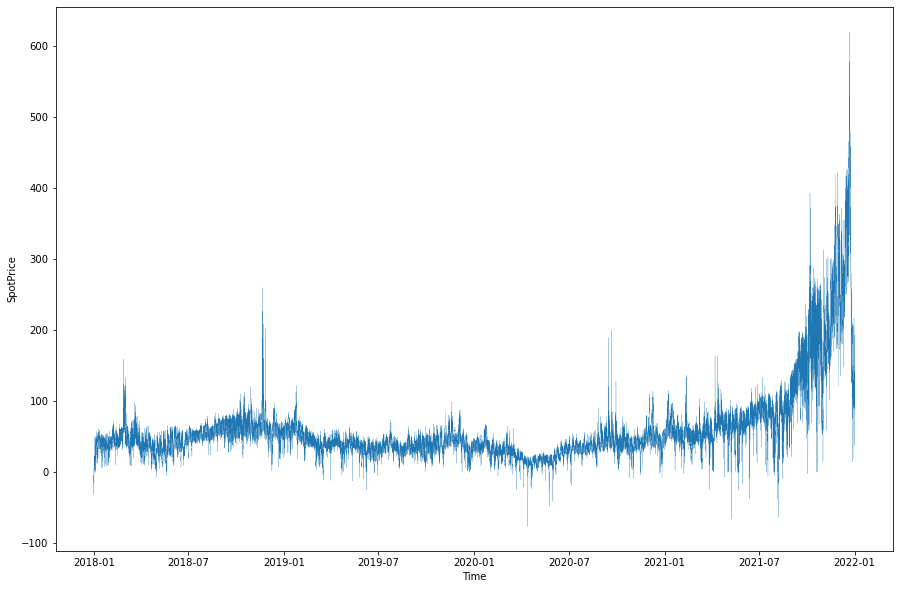

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Time', y='SpotPrice', linewidth=0.2)

#### c)
Autre traitements à faire :
* Ajouter jours fériés (Fait, ptet pas parfaitement)
* Ajouter jour de la semaine ;
* Ajouter vacances scolaires ;
* Ajouter avancement de l'année ?
* Ajouter variables de météos (ou prévision météos) ;

In [83]:
df.Date.dt.dayofwee

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [84]:
df.columns

Index(['Date', 'Hour', 'SpotPrice', 'Load', 'Prev_J2_Load', 'Prev_J1_Solar',
       'Prev_J1_WindOnshore', 'ES_SpotPrice', 'BE_SpotPrice', 'CH_SpotPrice',
       'IT_SpotPrice', 'UK_SpotPrice', 'DE_SpotPrice', 'GazPrice',
       'GBP_EUR_SPOT', 'USD_EUR_SPOT', 'M1_Coal', 'M1_Oil', 'Biomass',
       'Fossil_Gas', 'Fossil_Hard_Coal', 'Fossil_Oil', 'Hydro_Pumped_Storage',
       'Hydro_Run-of-river_and_poundage', 'Hydro_Water_Reservoir', 'Nuclear',
       'Solar', 'Waste', 'Wind_Onshore', 'Import_FR_BE', 'Import_FR_CH',
       'Import_FR_ES', 'Import_FR_GB', 'Import_FR_IT_North', 'Import_FR_DE',
       'Export_FR_BE', 'Export_FR_CH', 'Export_FR_ES', 'Export_FR_GB',
       'Export_FR_IT_North', 'Export_FR_DE', 'Lag_J2_SpotPrice',
       'Lag_J7_SpotPrice', 'Lag_J1_GazPrice', 'Lag_J7_GazPrice', 'Lag_J2_Load',
       'Lag_J1_GBP_EUR_SPOT', 'Lag_J1_USD_EUR_SPOT', 'Lag_J2_Biomass',
       'Lag_J7_Biomass', 'Lag_J2_Fossil_Gas', 'Lag_J7_Fossil_Gas',
       'Lag_J2_Fossil_Hard_Coal', 'Lag_J7_Foss

### d) Données indisponibilités

Questions : 
* Qu'est-ce que Marine ?
* Qu'est-ce que other ?
* Qu'est que unknown ?

In [104]:
df = pd.read_csv('data-raw/Indispos_2016_2021.csv', index_col=0)
data = pd.read_csv('data/data_processed.csv')
df['Time'] = pd.to_datetime(df.index.to_series().astype(str).apply(lambda x : x.split('+')[0]))
df['Date'] = df.Time.dt.date
df['Hour'] = df.Time.dt.hour
df.reset_index(drop=True, inplace=True)
df = df[df.Time.dt.year.isin([i for i in range(2018,2022)])]

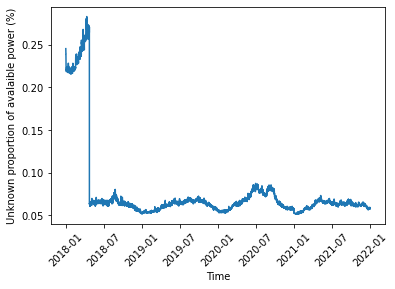

In [57]:
sns.lineplot(x=df.Time, y= 100 *(df['all'] - df['sum'])/df['all'])
plt.ylabel("Unknown proportion of avalaible power (%)")
plt.xticks(rotation=45)
plt.show()

In [155]:
df['Date'] = pd.to_datetime(df.Date)
df.Date.dt.year.isin((2018))

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [int]

In [105]:
df.rename(columns = {
    "biomass" : "Biomass_availability",
    "fossil_coal" : "Fossil_Hard_Coal_availability",
    "fossil_oil" : "Fossil_Oil_availability",
    "fossil_gas" : "Fossil_Gas_availability",
    "hydro_pumped_storage" : "Hydro_Pumped_Storage_availability",
    "hydro_reservoir" : 'Hydro_Water_Reservoir_availability',
    "hydro_run_of_river" : "Hydro_Run-of-river_and_poundage_availability",
    "marine" : "Marine_availability",
    "nuclear" : 'Nuclear_availability',
    "other" : 'Other_availability',
},inplace=True)

df['Unknown_availability'] = df['all'] - df['sum']

df = pd.concat([data, df.drop(columns=['all', 'sum', 'Time', 'Hour', 'Date']).reset_index(drop=True)], axis=1)

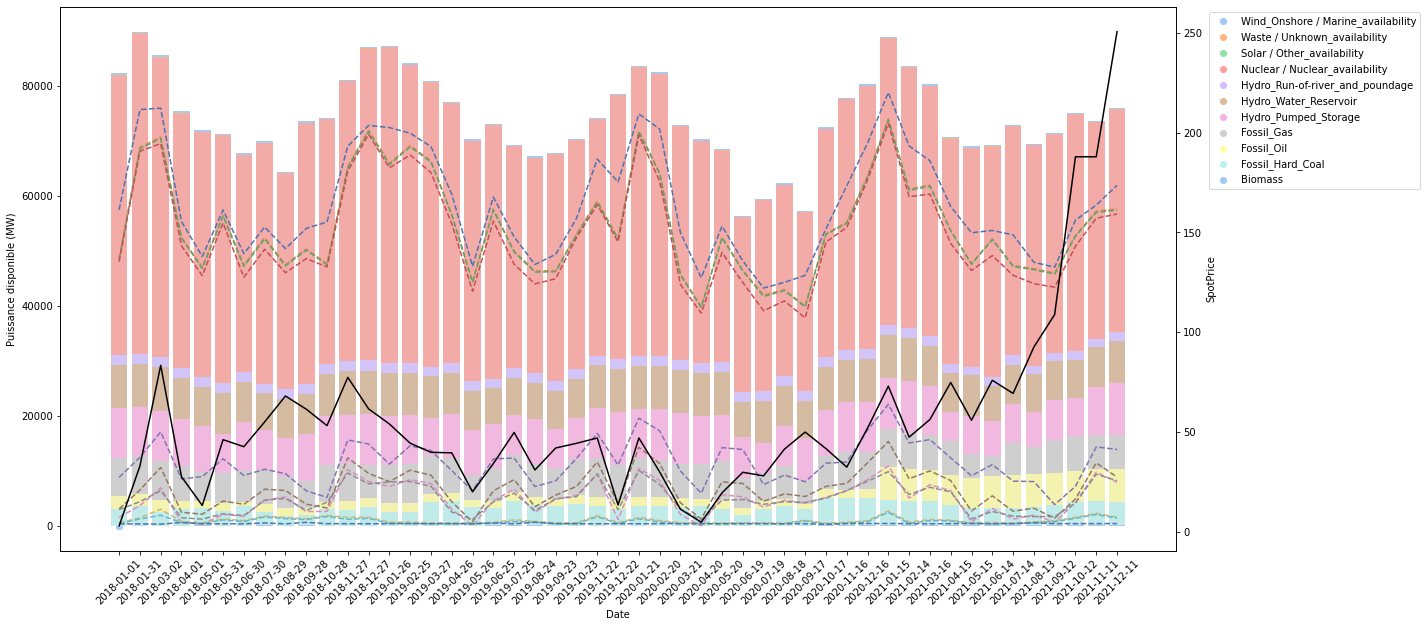

In [151]:
value_cols = [
        'Biomass_availability', 'Fossil_Hard_Coal_availability','Fossil_Oil_availability', 'Fossil_Gas_availability',
        'Hydro_Pumped_Storage_availability', 'Hydro_Water_Reservoir_availability','Hydro_Run-of-river_and_poundage_availability',
        'Nuclear_availability',
        'Other_availability', 'Unknown_availability', 'Marine_availability',]

value_cols_prod = [
        'Biomass', 'Fossil_Hard_Coal', 'Fossil_Oil', 'Fossil_Gas',
        'Hydro_Pumped_Storage', 'Hydro_Water_Reservoir', 'Hydro_Run-of-river_and_poundage',
        'Nuclear'
        ,'Solar', 'Waste', 'Wind_Onshore']

plt.figure(figsize=(20,10))

dfm_prod = pd.melt(df.groupby('Date')[value_cols_prod].mean().reset_index(), id_vars='Date', value_vars=value_cols_prod)
dfm = pd.melt(df.groupby('Date')[value_cols].mean().reset_index(), id_vars='Date', value_vars=value_cols)

dfs = {}
dfs_prod = {}
sum_ = 0

for col in value_cols:
    dfs[col] = dfm[dfm.variable==col].groupby('Date')['value'].sum().reset_index()
    dfs[col]['value'] += sum_
    sum_ = dfs[col]["value"].copy()

sum_ = 0
for col in value_cols_prod:
    dfs_prod[col] = dfm_prod[dfm_prod.variable==col].groupby('Date')['value'].sum().reset_index()
    dfs_prod[col]['value'] += sum_
    sum_ = dfs_prod[col]["value"].copy()
    

pal = sns.color_palette("pastel", n_colors=len(value_cols))
pal2 = sns.color_palette("deep", n_colors=len(value_cols))

for i, col in enumerate(value_cols_prod[::-1]):
    sns.barplot(data = dfs[value_cols[10-i]].iloc[::30], x='Date', y='value', color=pal[i])
    sns.lineplot(data = dfs_prod[col].iloc[::30], x='Date', y='value', color=pal2[i], linestyle='--')
    
    label = col if i>3 else col + ' / ' + value_cols[10-i]
    plt.scatter([0], [0], color=pal[i], label = label)

plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylabel('Puissance disponible (MW)')

ax2 = plt.twinx()
sns.lineplot(data = df.groupby('Date')['SpotPrice'].mean().reset_index().iloc[::30], x='Date', y='SpotPrice', color='k', ax = ax2)

plt.show()

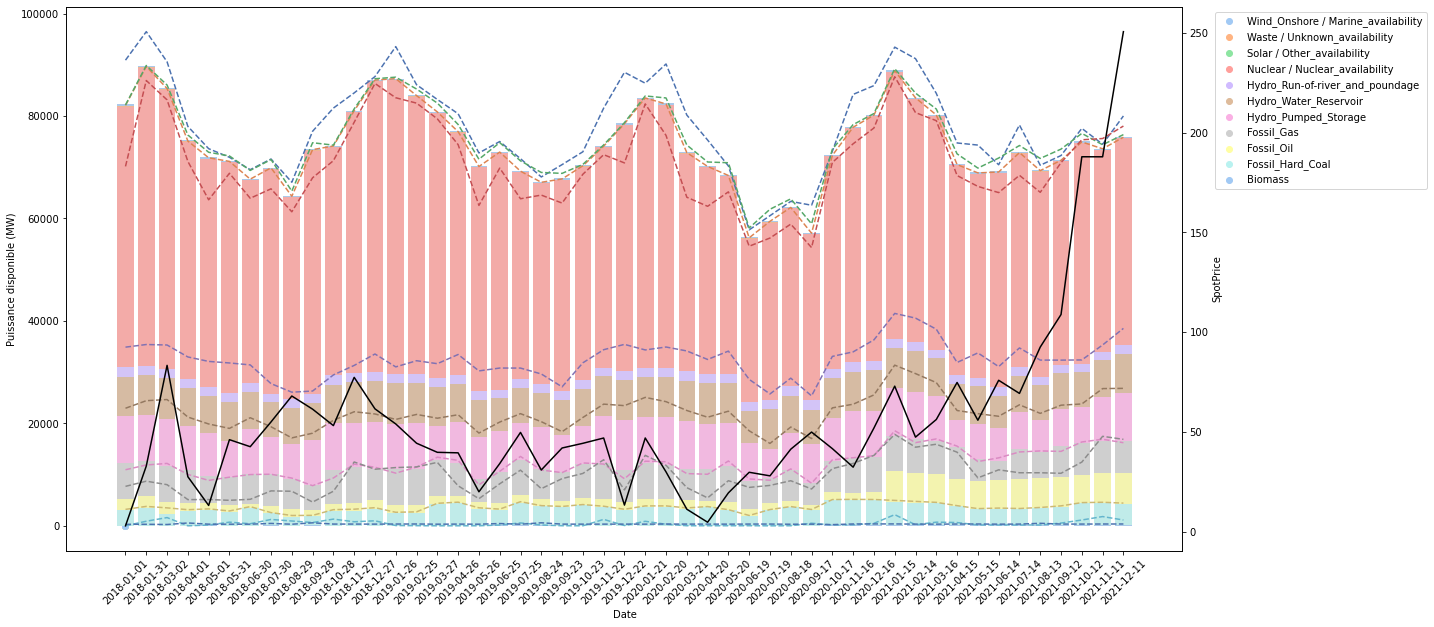

In [153]:
value_cols = [
        'Biomass_availability', 'Fossil_Hard_Coal_availability','Fossil_Oil_availability', 'Fossil_Gas_availability',
        'Hydro_Pumped_Storage_availability', 'Hydro_Water_Reservoir_availability','Hydro_Run-of-river_and_poundage_availability',
        'Nuclear_availability',
        'Other_availability', 'Unknown_availability', 'Marine_availability',]

value_cols_prod = [
        'Biomass', 'Fossil_Hard_Coal', 'Fossil_Oil', 'Fossil_Gas',
        'Hydro_Pumped_Storage', 'Hydro_Water_Reservoir', 'Hydro_Run-of-river_and_poundage',
        'Nuclear'
        ,'Solar', 'Waste', 'Wind_Onshore']

plt.figure(figsize=(20,10))

dfm_prod = pd.melt(df.groupby('Date')[value_cols_prod].mean().reset_index(), id_vars='Date', value_vars=value_cols_prod)
dfm = pd.melt(df.groupby('Date')[value_cols].mean().reset_index(), id_vars='Date', value_vars=value_cols)

dfs = {}
dfs_prod = {}
sum_ = 0

for i, col in enumerate(value_cols):
    dfs_prod[value_cols_prod[i]] = dfm_prod[dfm_prod.variable==value_cols_prod[i]].groupby('Date')['value'].sum().reset_index()
    dfs_prod[value_cols_prod[i]]['value'] += sum_
    
    dfs[col] = dfm[dfm.variable==col].groupby('Date')['value'].sum().reset_index()
    dfs[col]['value'] += sum_
    sum_ = dfs[col]["value"].copy()
    


pal = sns.color_palette("pastel", n_colors=len(value_cols))
pal2 = sns.color_palette("deep", n_colors=len(value_cols))

for i, col in enumerate(value_cols_prod[::-1]):
    sns.barplot(data = dfs[value_cols[10-i]].iloc[::30], x='Date', y='value', color=pal[i])
    sns.lineplot(data = dfs_prod[col].iloc[::30], x='Date', y='value', color=pal2[i], linestyle='--')
    
    label = col if i>3 else col + ' / ' + value_cols[10-i]
    plt.scatter([0], [0], color=pal[i], label = label)

plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylabel('Puissance disponible (MW)')

ax2 = plt.twinx()
sns.lineplot(data = df.groupby('Date')['SpotPrice'].mean().reset_index().iloc[::30], x='Date', y='SpotPrice', color='k', ax = ax2)

plt.show()

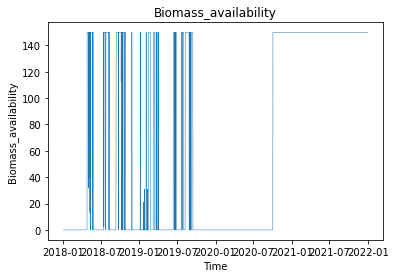

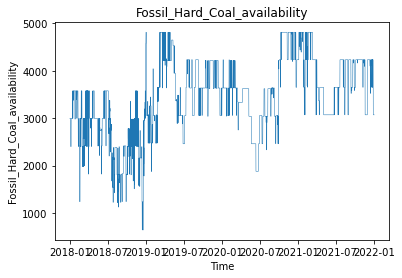

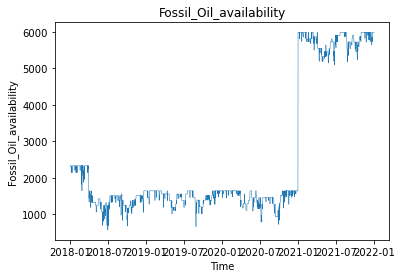

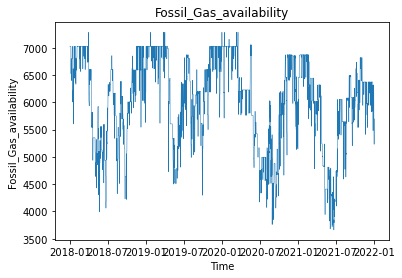

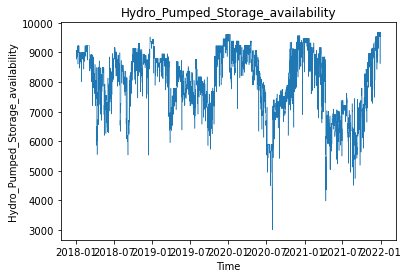

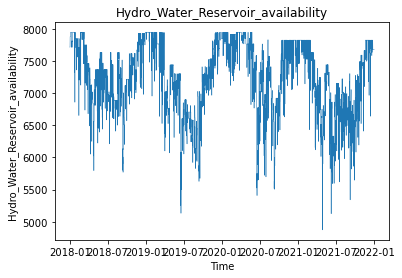

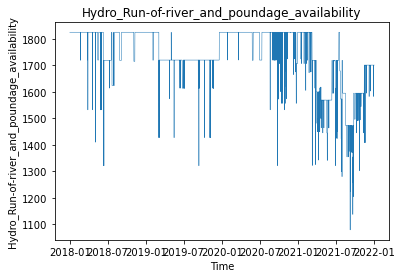

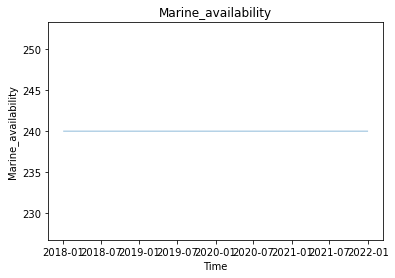

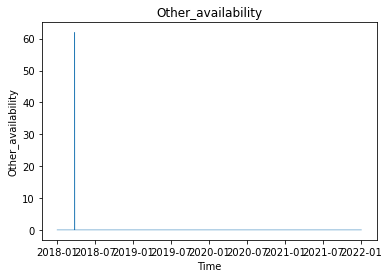

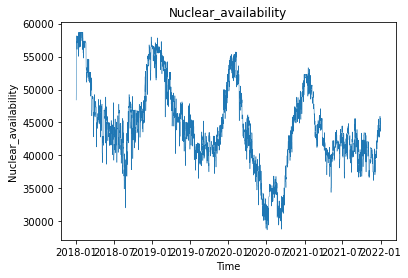

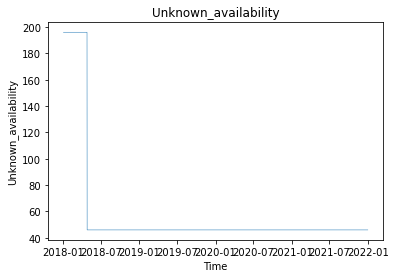

In [89]:
df['Time'] =  pd.to_datetime(df['Date'].astype(str) + '-' + df['Hour'].astype(str) ,format='%Y-%m-%d-%H')

for col in df.columns[99:110]:
    sns.lineplot(data=df, x='Time', y=col, linewidth=0.5)
    plt.title(col)
    plt.show()

Qqs Remarques :
* Pourquoi Hydro Run of River beaucoup plus grand que capacité installée (imports ?)
* Pourquoi Hydro Pump Storage parfois plus faible que capacité installée ?
* Marine Availability est constante, on l'ignore


### e) Introducing the hours

In [73]:
df = pd.read_csv('data/data_processed.csv')
df = df.drop(columns=['Unnamed: 0'])


In [74]:
list_daily_var = []
for col in df.columns:
    if df[col].value_counts().min() >= 24:
        list_daily_var.append(col)
print(set(list_daily_var) - set(daily_features))

{'toy', 'hour_cos', 'Marine_availability', 'hour_sin', 'toy_cos', 'toy_sin', 'Hour', 'Date'}


In [76]:
daily_features = [
    'GazPrice',
    'GBP_EUR_SPOT',
    'USD_EUR_SPOT',
    'M1_Coal',
    'M1_Oil',
    'Lag_J1_GazPrice',
    'Lag_J7_GazPrice',
    'Lag_J1_GBP_EUR_SPOT',
    'Lag_J1_USD_EUR_SPOT',
    'PublicHoliday',
    'PublicHoliday_FR',
    'PublicHoliday_DE',
    'PublicHoliday_GB',
    'PublicHoliday_IT',
    'PublicHoliday_BE',
    'SchoolHoliday_FR',
    'SchoolHoliday_FR_C',
    'SchoolHoliday_FR_A',
    'SchoolHoliday_FR_B',
    'weekday',
    'Ponts_FR',
    'toy',
    'toy_cos',
    'toy_sin'
]

dfh = pd.pivot(
    data=df,
    index=['Date'], 
    values=df.drop(columns=["Date", "Hour", 'hour_cos', 'hour_sin'] + daily_features).columns,
    columns=['Hour']         
    ).reset_index()

In [77]:
level_two = dfh.columns.get_level_values(1)
dfh.columns = dfh.columns.get_level_values(0)
dfh.columns = [f'{col}_H{hour}' for col, hour in zip(dfh.columns, list(level_two.astype(str)))]

In [79]:
dfh

,Date_H,SpotPrice_H0,SpotPrice_H1,SpotPrice_H2,SpotPrice_H3,SpotPrice_H4,SpotPrice_H5,SpotPrice_H6,SpotPrice_H7,SpotPrice_H8,...,Unknown_availability_H14,Unknown_availability_H15,Unknown_availability_H16,Unknown_availability_H17,Unknown_availability_H18,Unknown_availability_H19,Unknown_availability_H20,Unknown_availability_H21,Unknown_availability_H22,Unknown_availability_H23
0,2018-01-01,4.74,3.66,1.26,-20.10,-31.82,-28.66,-13.71,-4.14,2.03,...,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
1,2018-01-02,10.26,7.48,4.52,4.24,8.36,22.58,41.92,47.95,49.90,...,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
2,2018-01-03,5.48,5.00,0.99,-0.25,3.87,12.25,19.42,22.57,22.37,...,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
3,2018-01-04,3.46,2.11,2.63,4.99,11.08,22.34,33.59,40.45,41.97,...,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
4,2018-01-05,11.73,6.86,0.55,2.45,13.51,23.96,33.39,37.79,36.93,...,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,135.03,138.33,97.46,76.04,97.53,137.19,157.15,171.47,204.17,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
1457,2021-12-28,44.29,37.28,20.48,14.76,22.43,65.68,103.56,122.61,143.45,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
1458,2021-12-29,93.27,94.37,90.82,94.01,117.63,139.98,188.00,200.00,203.45,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
1459,2021-12-30,47.86,33.12,25.56,21.36,42.01,49.91,98.38,111.27,122.78,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0


## 1) Analyse des variables


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from preprocessing.variable_selection import feature_importance_integrated, feature_importance_performance, recursive_feature_elimination
from preprocessing.preprocessing import date_split
import plotly.express as px


ModuleNotFoundError: No module named 'vars_preprocessing'

### a) Distribution analysis

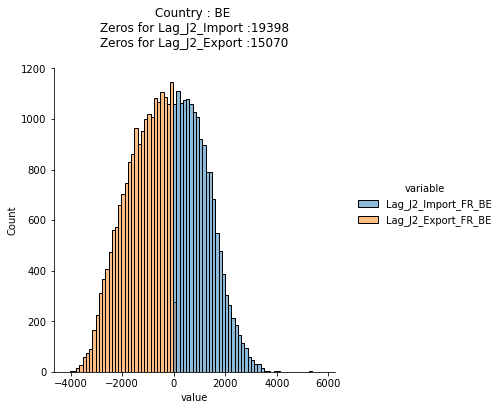

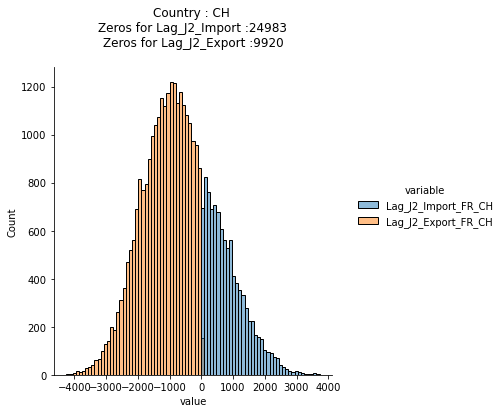

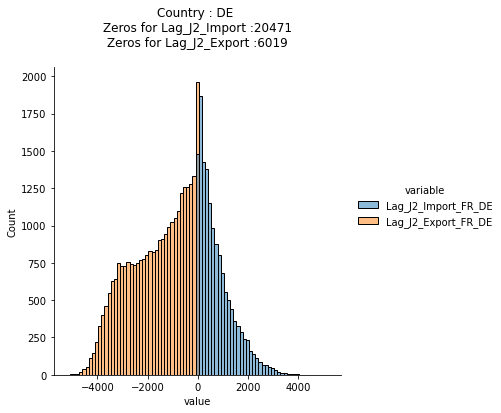

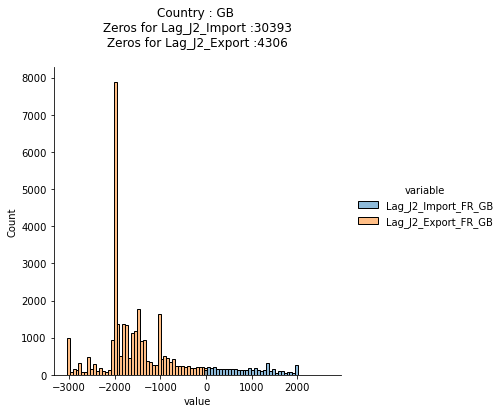

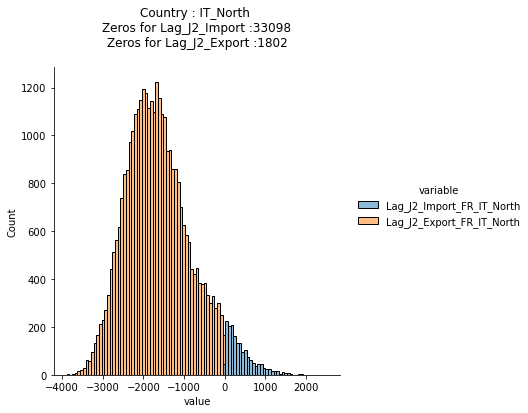

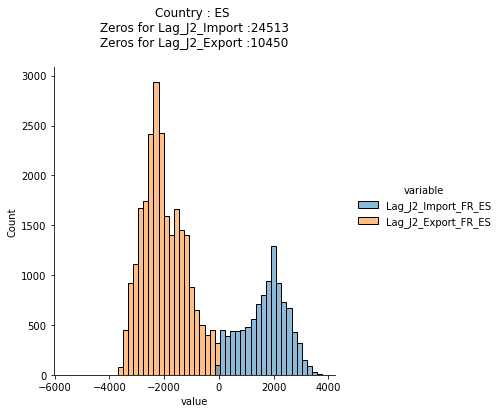

In [53]:
features_import_export = list(df.columns[82:106])
nat_type = ['BE', 'CH', 'DE', 'GB', 'IT_North', 'ES']
# J-7 et J-2 ont la même répartition
var_type = ['Lag_J2_Import', 'Lag_J2_Export']

for nat in nat_type:
    columns = [f'{var}_FR_{nat}' for var in var_type]
    df_reduced = df[columns]
    dfm = pd.melt(df_reduced)
    
    zero_count = f"Country : {nat} \n"
    for var in var_type:
        zero_count += f"Zeros for {var} :{(df_reduced[f'{var}_FR_{nat}'] == 0).sum()}\n"
        
    sns.displot(data=dfm[~(dfm.value==0)], x='value', hue='variable', kind='hist', linewidth=1.)
    plt.title(zero_count)
    plt.show()

### b) Corrélations de variables

In [69]:
df = pd.read_csv('data/data_processed.csv')
df = df.drop(columns=['Unnamed: 0'])
df['Time'] = pd.to_datetime(df.Date + "-" + df.Hour.astype(str), format="%Y-%m-%d-%H")
df = df[df.Date > "2018-01-07"]

#for i, feat in enumerate(df.columns):
#    print(i, ' : ', feat)
    
features = ["Prev_J2_Load", "Prev_J1_Solar", "Prev_J1_WindOnshore", "M1_Coal", "M1_Oil"]
features += list(df.columns[50:88])
features += ["PublicHoliday", "SchoolHoliday_FR", "weekday", "toy_cos", "Ponts_FR", 'toy_sin', 'hour_cos', 'hour_sin']
# periodic_variables
features += list(df.columns[35:50])
features += ['SpotPrice']

df_train, df_test = date_split(df, date="2020-12-31")

In [77]:
plt.figure(figsize=(20,20))
px.imshow(df_train[features].corr(), x=features, y=features, width=1000, height=1000)

<Figure size 1440x1440 with 0 Axes>

In [78]:
plt.figure(figsize=(20,20))
px.imshow(df_train[features].corr("spearman"), x=features, y=features, width=1000, height=1000)

<Figure size 1440x1440 with 0 Axes>

### c) Importance des variables

In [2]:
df = pd.read_csv('data/data_processed.csv')
df = df.drop(columns=['Unnamed: 0'])
df['Time'] = pd.to_datetime(df.Date + "-" + df.Hour.astype(str), format="%Y-%m-%d-%H")
df = df[df.Date > "2018-01-07"]

#for i, feat in enumerate(df.columns):
#    print(i, ' : ', feat)
    
features = ["Prev_J2_Load", "Prev_J1_Solar", "Prev_J1_WindOnshore", "M1_Coal", "M1_Oil"]
features += list(df.columns[50:70])  # ignore lag J2 & J7 Solar
features += list(df.columns[72:88])
features += ["PublicHoliday", "SchoolHoliday_FR", "weekday", "toy_cos", "Ponts_FR", 'toy_sin', 'hour_cos', 'hour_sin']

df_train, df_test = date_split(df, date="2020-12-31")
df_train_sep, df_val = date_split(df_train, date="2019-12-31")

X_train, y_train = df_train[features], df_train["SpotPrice"]
X_train_sep, y_train_sep = df_train_sep[features], df_train_sep["SpotPrice"]
X_val, y_val = df_val[features], df_val["SpotPrice"]
X_test, y_test = df_test[features], df_train["SpotPrice"]

print('Selected features :\n', features)


Selected features :
 ['Prev_J2_Load', 'Prev_J1_Solar', 'Prev_J1_WindOnshore', 'M1_Coal', 'M1_Oil', 'Lag_J2_Load', 'Lag_J7_Load', 'Lag_J1_GBP_EUR_SPOT', 'Lag_J1_USD_EUR_SPOT', 'Lag_J2_Biomass', 'Lag_J7_Biomass', 'Lag_J2_Fossil_Gas', 'Lag_J7_Fossil_Gas', 'Lag_J2_Fossil_Hard_Coal', 'Lag_J7_Fossil_Hard_Coal', 'Lag_J2_Fossil_Oil', 'Lag_J7_Fossil_Oil', 'Lag_J2_Hydro_Pumped_Storage', 'Lag_J7_Hydro_Pumped_Storage', 'Lag_J2_Hydro_Run-of-river_and_poundage', 'Lag_J7_Hydro_Run-of-river_and_poundage', 'Lag_J2_Hydro_Water_Reservoir', 'Lag_J7_Hydro_Water_Reservoir', 'Lag_J2_Nuclear', 'Lag_J7_Nuclear', 'Lag_J2_Waste', 'Lag_J7_Waste', 'Lag_J2_Wind_Onshore', 'Lag_J7_Wind_Onshore', 'Lag_J2_Exchange_FR_BE', 'Lag_J7_Exchange_FR_BE', 'Lag_J2_Exchange_FR_CH', 'Lag_J7_Exchange_FR_CH', 'Lag_J2_Exchange_FR_ES', 'Lag_J7_Exchange_FR_ES', 'Lag_J2_Exchange_FR_GB', 'Lag_J7_Exchange_FR_GB', 'Lag_J2_Exchange_FR_IT_North', 'Lag_J7_Exchange_FR_IT_North', 'Lag_J2_Exchange_FR_DE', 'Lag_J7_Exchange_FR_DE', 'PublicHoliday'

In [4]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

model = CatBoostRegressor(verbose=0)
model_rf = RandomForestRegressor()
feature_importance = feature_importance_integrated(X_train, y_train, model)
feature_importance_rf = feature_importance_integrated(X_train, y_train, model_rf)
feature_importance_mda = feature_importance_integrated(X_train_sep, y_train_sep, model, method='MDA', X_val=X_val, y_val=y_val)
feature_importance_rf_mda = feature_importance_integrated(X_train_sep, y_train_sep, model_rf, method='MDA', X_val=X_val, y_val=y_val)

In [5]:
feature_importance_mda_melted = pd.melt(feature_importance_mda)
feature_importance_mda_melted.columns = ['feature', 'importance']
feature_importance_rf_mda_melted = pd.melt(feature_importance_rf_mda)
feature_importance_rf_mda_melted.columns = ['feature', 'importance']

feature_importance["model"] = "catboost"
feature_importance["importance"] /= feature_importance['importance'].sum()
feature_importance_rf["model"] = "RF"

feature_importance_mda_melted["model"] = "catboost_mda"
feature_importance_mda_melted["importance"] /= feature_importance_mda_melted['importance'].abs().sum()
feature_importance_rf_mda_melted["model"] = "RF_mda"
feature_importance_rf_mda_melted["importance"] /= feature_importance_rf_mda_melted['importance'].abs().sum()

df_fi = feature_importance.append(feature_importance_rf)
df_fi = df_fi.append(feature_importance_rf_mda_melted)
df_fi = df_fi.append(feature_importance_mda_melted)



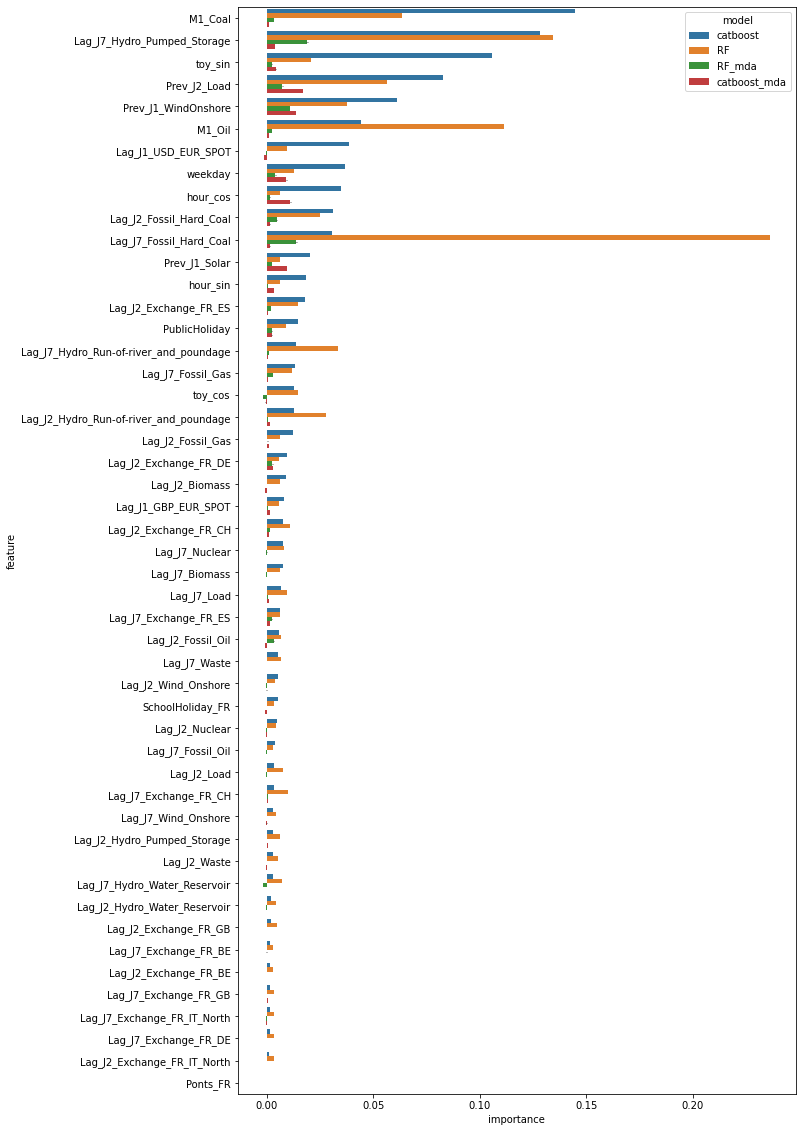

In [6]:
plt.figure(figsize=(10,20))
sns.barplot(data=df_fi, x="importance", y='feature', hue='model', errwidth=0.5)
plt.show()


### d) Recursive Feature Elimination

In [3]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

model = CatBoostRegressor(verbose=0)
model_rf = RandomForestRegressor()